# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# Carregando o dataset de habitação da Califórnia
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=['MedHouseVal'])

# Visualização dos primeiros registros
print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422


In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
# Verifique os tipos de dados para garantir que todos sejam numéricos
print(X.dtypes)

# Verifique se há valores nulos
print(X.isnull().sum())
print(y.isnull().sum())

# Se necessário, trate os valores nulos aqui
# Por exemplo, você pode substituir os valores nulos pela média da coluna
# X.fillna(X.mean(), inplace=True)

# Opcional: Escalonamento dos dados
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
MedHouseVal    0
dtype: int64


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

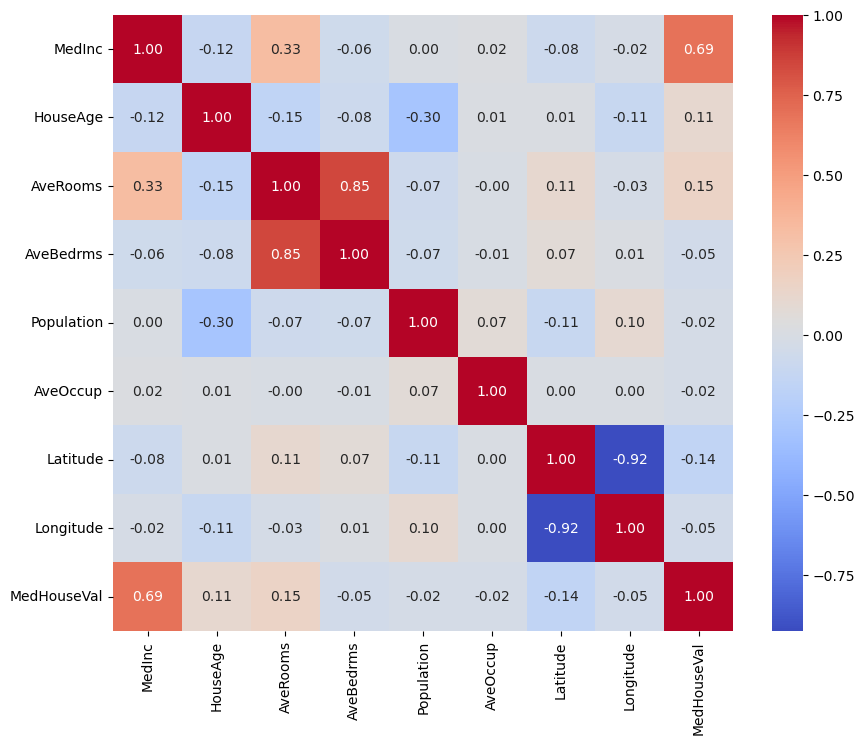

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X e y em um único DataFrame
data = pd.concat([X, y], axis=1)

# Calcule a matriz de correlação
corr_matrix = data.corr()

# Crie um heatmap para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


### 3. Separe os dados em validação e teste

In [6]:
from sklearn.model_selection import train_test_split

# Definindo a proporção para o conjunto de teste (geralmente entre 20% e 30%)
test_size = 0.2  # 20% dos dados serão utilizados para o conjunto de teste

# Separação dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Verifique os tamanhos dos conjuntos de treino e teste
print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')


Tamanho do conjunto de treino: 16512 amostras
Tamanho do conjunto de teste: 4128 amostras


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Criação do modelo com profundidade máxima = 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8)
tree_depth_8.fit(X_train, y_train)

# Criação do modelo com profundidade máxima = 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2)
tree_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [8]:
from sklearn.metrics import mean_squared_error

# Previsões para a base de treinamento
y_train_pred_depth_8 = tree_depth_8.predict(X_train)
y_train_pred_depth_2 = tree_depth_2.predict(X_train)

# Previsões para a base de testes
y_test_pred_depth_8 = tree_depth_8.predict(X_test)
y_test_pred_depth_2 = tree_depth_2.predict(X_test)

# Cálculo do MSE para a base de treinamento
mse_train_depth_8 = mean_squared_error(y_train, y_train_pred_depth_8)
mse_train_depth_2 = mean_squared_error(y_train, y_train_pred_depth_2)

# Cálculo do MSE para a base de testes
mse_test_depth_8 = mean_squared_error(y_test, y_test_pred_depth_8)
mse_test_depth_2 = mean_squared_error(y_test, y_test_pred_depth_2)

# Exibir os resultados
print(f'MSE para a árvore com profundidade 8 - Treino: {mse_train_depth_8}, Teste: {mse_test_depth_8}')
print(f'MSE para a árvore com profundidade 2 - Treino: {mse_train_depth_2}, Teste: {mse_test_depth_2}')


MSE para a árvore com profundidade 8 - Treino: 0.32059498910401363, Teste: 0.4225735180580778
MSE para a árvore com profundidade 2 - Treino: 0.7324946684204919, Teste: 0.7542635096031615


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade 8 parece ser a mais adequada, pois, apesar de um leve sobreajuste, ela fornece um erro médio significativamente menor em ambos os conjuntos de dados.
A árvore com profundidade 2, embora apresente um comportamento mais consistente entre treino e teste, tem um desempenho geral mais fraco, com um erro médio mais alto.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

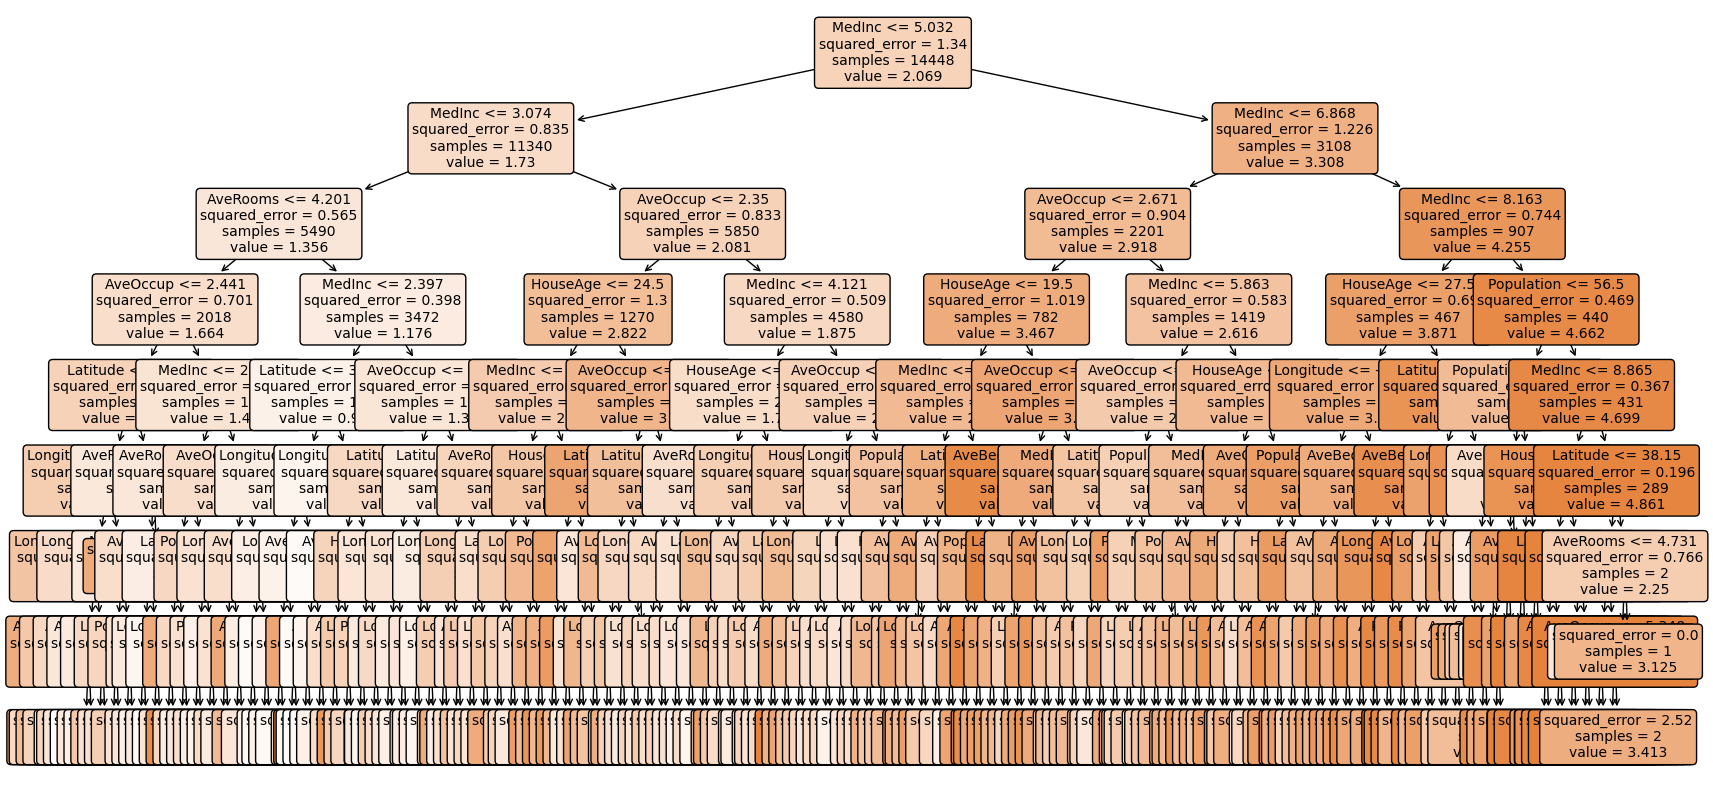

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Carregar o California Housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar a Árvore de Decisão para regressão
tree = DecisionTreeRegressor(max_depth=8, random_state=42)
tree.fit(X_train, y_train)

# Converter os nomes das colunas em uma lista
feature_names_list = X.columns.tolist()

# Visualizar a Árvore de Decisão
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=feature_names_list, filled=True, rounded=True, fontsize=10)
plt.show()



Acrediti que a variável mais importante seja a MedInc, pela previsão do valor mediano das casas no modelo da árvore de decisão que foi treinado. Pois a renda média dos moradores em uma área geralmente está fortemente correlacionada com o valor imobiliário da área.